# Final Project Submission
Please fill out:

-  Student name: Steven Rosa
-  Student pace: part time
-  Scheduled project review date/time: Mon 4 Feb 2019 2pm EST
-  Instructor name: Jeff Herman
-  Blog post URL:

# Northwind Data Analysis

<a id="top"></a>

# Contents
- [Import libraries](#importlibraries)
- [Write functions](#writefunctions)
- [Exploratory data analysis](#eda)

<a id="importlibraries"></a>

# Import libraries
[(Back to top)](#top)

In [1]:
#Import libraries
import sqlalchemy #ORM
from sqlalchemy import create_engine #To connect to the database
from sqlalchemy.orm import Session, sessionmaker #To interact with the database as object
from sqlalchemy import inspect #To look at tables and column names
from sqlalchemy import MetaData #To reflect the engine object 
from sqlalchemy.ext.automap import automap_base # To create mappings from the reflection
import pandas as pd #To read in parts of the database as DataFrames

import matplotlib.pyplot as plt #For creating visualizations
from scipy.stats import norm #For plotting probablity density functions
import seaborn as sns #For plotting pdfs over histograms
import numpy as np #For mathematical operations and arrays

In [37]:
from scipy import stats

<a id="writefunctions"></a>

# Write functions
[(Back to top)](#top)

In [2]:
#Build a sampling distribution of the data 
#in order to get it more "normal"
def sampling_dist(data, dist=50, n=30):

    sample_dist = []
   
    while len(sample_dist) != dist: #Build a sample distribution
        sample = []
        while len(sample) != n:
            x = np.random.choice(data) #Get a value from the data with replacement
            sample.append(x) #Add the value to the sample
        sample_mean = sum(sample) / len(sample) #Get the mean of the sample
        sample_dist.append(sample_mean) #Add the mean to the sampling distribution
    
    return sample_dist

<a id="eda"></a>

# Exploratory data analysis
[(Back to top)](#top)

In [3]:
#Instantiate a session of the ORM
#Connect to the sqlite database file
engine = create_engine('sqlite:///Northwind_small.sqlite', echo = True)
#Bind a session factory to the engine
Session = sessionmaker(bind=engine)
#Instantiate a session
session = Session()

In [ ]:
#An object to get a first look at the database
inspector = inspect(engine)

In [ ]:
#Make a dict of list of names of all the columns in all the tables
#for easy reference

#Get list of all table names
table_names = inspector.get_table_names()

tables_columns = dict()
#For each table name
for table in table_names:
    column_names = []
    #for each column in the table, get just the name
    for column in inspector.get_columns(table):
        column_names.append(column['name'])
    tables_columns[table] = column_names

In [ ]:
tables_columns['OrderDetail']

In [ ]:
#Pull raw results from the database
#conn = engine.connect()
#results = conn.execute('''SELECT *
#                            FROM Category
#                        ;''')
#print(results.fetchall())

In [ ]:
###conn = engine.connect()
#results = conn.execute("SELECT * FROM [Order];")
#df = pd.DataFrame(results.fetchall())
#df.head()

In [ ]:
#results = conn.execute('''SELECT *
#                            FROM OrderDetail
#                        ;''')
#df = pd.DataFrame(results.fetchall())
#df.head()

In [ ]:
#df = pd.read_sql_query('''SELECT * 
#                           FROM [Order]
#                       ;''', engine)
#df.head()

In [ ]:
#df = pd.read_sql_query("SELECT * FROM [Order] WHERE CUSTOMERId = 'VINET'", engine)
#df.head()

In [ ]:
df = pd.read_sql_query("""SELECT OrderDetail.*, [Order].CustomerId 
                            FROM OrderDetail 
                            INNER JOIN [Order] on OrderDetail.OrderId = [Order].Id
                            WHERE OrderDetail.Discount != 0.0
                        """, engine)
df.head()

In [ ]:
#WHERE OrderDetail.Discount != 0.0

In [ ]:
#Look at all orders with and without discounts
df = pd.read_sql_query("""SELECT OrderDetail.*, [Order].CustomerId
                            FROM OrderDetail 
                            INNER JOIN [Order] on OrderDetail.OrderId = [Order].Id
                            ORDER BY [Order].CustomerId DESC, [Order].Id DESC, OrderDetail.Discount DESC
                        """, engine)


In [ ]:
#Look at all orders with and without discounts
df.head()

In [ ]:
#Look at number of orders per cust id
df = pd.read_sql_query("""SELECT [Order].CustomerId, Count(*) orders
                            FROM OrderDetail 
                            INNER JOIN [Order] on OrderDetail.OrderId = [Order].Id
                            GROUP BY [Order].CustomerId
                            ORDER BY [Order].CustomerId ASC
                        """, engine)

In [ ]:
#Look at number of orders per cust id
df.head()

In [ ]:
#Look at number of orders per customer w/o discount
df_wo_discount = pd.read_sql_query("""SELECT [Order].CustomerId, Count(*) orders
                            FROM OrderDetail 
                            INNER JOIN [Order] on OrderDetail.OrderId = [Order].Id
                            WHERE OrderDetail.Discount == 0.0
                            GROUP BY [Order].CustomerId
                            ORDER BY [Order].CustomerId ASC
                        """, engine)

#Look at number of orders per customer w/ discount
df_w_discount = pd.read_sql_query("""SELECT [Order].CustomerId, Count(*) orders
                            FROM OrderDetail 
                            INNER JOIN [Order] on OrderDetail.OrderId = [Order].Id
                            WHERE OrderDetail.Discount != 0.0
                            GROUP BY [Order].CustomerId
                            ORDER BY [Order].CustomerId ASC
                        """, engine)

In [ ]:
df_wo_discount.head()

In [ ]:
df_w_discount.head()

In [ ]:
#Look at the levels of discount

df = pd.read_sql_query("""SELECT OrderDetail.*
                            FROM OrderDetail 
                        """, engine)
df['Discount'].value_counts()

In [ ]:
#Look at number of orders w and wo discount per cust id
###Insert soup for Emily with no bacon
df = pd.read_sql_query('''SELECT [Order].CustomerId,
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.0 
                                THEN 1 ELSE 0 END
                                ) no_disc,
                            SUM(
                                CASE WHEN OrderDetail.Discount != 0.0 
                                THEN 1 ELSE 0 END
                                ) all_discs,
                            SUM(
                                CASE WHEN OrderDetail.Discount < 0.06 
                                AND OrderDetail.Discount > 0.0
                                THEN 1 ELSE 0 END
                                ) disc06,
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.1 
                                THEN 1 ELSE 0 END
                                ) disc10,
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.15 
                                THEN 1 ELSE 0 END
                                ) disc15,
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.2 
                                THEN 1 ELSE 0 END
                                ) disc20,
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.25 
                                THEN 1 ELSE 0 END
                                ) disc25,
                            Count(*) total_orders
                            FROM OrderDetail 
                            INNER JOIN [Order] on OrderDetail.OrderId = [Order].Id
                            GROUP BY [Order].CustomerId
                            ORDER BY [Order].CustomerId ASC
                        ''', engine)



In [ ]:
df.head()

In [ ]:
#See what one order looks like 
df = pd.read_sql_query('''SELECT *
                            FROM OrderDetail
                            LIMIT 1
                        ''', engine)

In [ ]:
#See what one order looks like
df

In [ ]:
#See what orders look like with total money spent
df = pd.read_sql_query('''SELECT *,
                                (od.UnitPrice * od.Quantity) total_price
                            FROM OrderDetail od
                        ''', engine)

In [ ]:
df.head()


In [4]:
#Compare quantities ordered with and without discounts

discs_ords = pd.read_sql_query('''SELECT [Order].CustomerId,
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.0 
                                THEN 1 ELSE 0 END
                                ) no_disc,
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.0
                                THEN OrderDetail.Quantity ELSE 0 END
                                ) quant_no_disc,
                            SUM(
                                CASE WHEN OrderDetail.Discount != 0.0 
                                THEN 1 ELSE 0 END
                                ) all_discs,
                            SUM(
                                CASE WHEN OrderDetail.Discount != 0.0
                                THEN OrderDetail.Quantity ELSE 0 END
                                ) quant_all_discs,
                            SUM(
                                CASE WHEN OrderDetail.Discount < 0.06 
                                AND OrderDetail.Discount > 0.0
                                THEN 1 ELSE 0 END
                                ) disc06,                            
                            SUM(
                                CASE WHEN OrderDetail.Discount < 0.06
                                AND OrderDetail.Discount > 0.0
                                THEN OrderDetail.Quantity ELSE 0 END
                                ) quant_disc06,
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.1 
                                THEN 1 ELSE 0 END
                                ) disc10,
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.1
                                THEN OrderDetail.Quantity ELSE 0 END
                                ) quant_disc10,                            
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.15 
                                THEN 1 ELSE 0 END
                                ) disc15,
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.15
                                THEN OrderDetail.Quantity ELSE 0 END
                                ) quant_disc15,                            
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.2 
                                THEN 1 ELSE 0 END
                                ) disc20,
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.2
                                THEN OrderDetail.Quantity ELSE 0 END
                                ) quant_disc20,                                
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.25 
                                THEN 1 ELSE 0 END
                                ) disc25,
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.25
                                THEN OrderDetail.Quantity ELSE 0 END
                                ) quant_disc25,
                            Count(*) total_orders,
                            SUM(OrderDetail.Quantity) total_quantities
                            FROM OrderDetail 
                            INNER JOIN [Order] on OrderDetail.OrderId = [Order].Id
                            GROUP BY [Order].CustomerId
                            ORDER BY [Order].CustomerId ASC
                        ''', engine)


2019-01-31 08:27:18,990 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-01-31 08:27:18,990 INFO sqlalchemy.engine.base.Engine ()
2019-01-31 08:27:18,990 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-01-31 08:27:18,990 INFO sqlalchemy.engine.base.Engine ()
2019-01-31 08:27:19,000 INFO sqlalchemy.engine.base.Engine SELECT [Order].CustomerId,
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.0 
                                THEN 1 ELSE 0 END
                                ) no_disc,
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.0
                                THEN OrderDetail.Quantity ELSE 0 END
                                ) quant_no_disc,
                            SUM(
                                CASE WHEN OrderDetail.Discount != 0.0 
                              

In [5]:
#Compare quantities ordered with and without discounts
discs_ords.head()

,CustomerId,no_disc,quant_no_disc,all_discs,quant_all_discs,disc06,quant_disc06,disc10,quant_disc10,disc15,quant_disc15,disc20,quant_disc20,disc25,quant_disc25,total_orders,total_quantities
0,ALFKI,6,78,6,96,2,56,0,0,0,0,1,2,3,38,12,174
1,ANATR,10,63,0,0,0,0,0,0,0,0,0,0,0,0,10,63
2,ANTO,9,211,8,148,0,0,4,80,4,68,0,0,0,0,17,359
3,AROUT,23,439,7,211,3,128,2,40,1,28,1,15,0,0,30,650
4,BERGS,34,632,18,369,0,0,10,161,0,0,0,0,8,208,52,1001


In [ ]:
#Sanity check for quantities
#w/o discount. ALL GOOD
#df_wo_discount = pd.read_sql_query('''SELECT [Order].CustomerId, 
#                                        SUM(
#                                            CASE WHEN OrderDetail.Discount == 0.0
#                                            THEN OrderDetail.Quantity ELSE 0 END
#                                            ) quants_nodisc
#                                        FROM OrderDetail
#                                        INNER JOIN [Order] on OrderDetail.OrderId = [Order].Id
#                                        GROUP BY [Order].CustomerId
#                                        ORDER BY [Order].CustomerId ASC
#                                    ''', engine)

#w/ discount
#df_w_discount = pd.read_sql_query('''SELECT [Order].CustomerId,
#                                        SUM(
#                                            CASE WHEN OrderDetail.Discount != 0.0
#                                            THEN OrderDetail.Quantity ELSE 0 END
#                                            ) quants_disc
#                                        FROM OrderDetail 
#                                        INNER JOIN [Order] on OrderDetail.OrderId = [Order].Id
#                                        WHERE OrderDetail.Discount != 0.0
#                                        GROUP BY [Order].CustomerId
#                                        ORDER BY [Order].CustomerId ASC
#                                ''', engine)

In [ ]:
#df_wo_discount.head()

In [ ]:
#df_w_discount.head()

In [ ]:
discs_ords.shape

In [ ]:
discs_ords['quant_no_disc'].mean()

In [ ]:
discs_ords['quant_all_discs'].mean()

In [ ]:
discs_ords['quant_no_disc'].sum()

In [ ]:
discs_ords['quant_all_discs'].sum()

In [ ]:
#Not sure whether grouping is affecting the quantity sums per order. 
#i.e. is it adding up the quantities for every record assoc with an order id or just for one?
#Look at number of orders per cust id

#alfki = pd.read_sql_query("""SELECT [Order].CustomerId, OrderDetail.*
#                            FROM OrderDetail 
#                            
#                            INNER JOIN [Order] on OrderDetail.OrderId = [Order].Id
#                            WHERE [Order].CustomerId == 'ALFKI'
#                        """, engine)

In [ ]:
#PROVEN: sum is of quantities for every record not the group
#alfki['Quantity'].sum()

In [ ]:
len(discs_ords['quant_no_disc'])

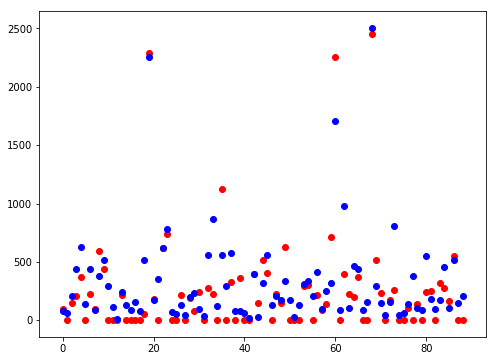

In [6]:
#Compare quantitites ordered per customer w and wo discount
fig = plt.figure(figsize=(8,6))
plt.scatter(range(len(discs_ords['quant_all_discs'])), discs_ords['quant_all_discs'], color='red')
plt.scatter(range(len(discs_ords['quant_no_disc'])), discs_ords['quant_no_disc'], color='blue')

In [ ]:
#Spread of raw data looks extremely close between the two. Shoudl look at hists and pdfs of each

(array([41., 21.,  9.,  6.,  4.,  3.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  2.,  1.]),
 array([   0.  ,  122.85,  245.7 ,  368.55,  491.4 ,  614.25,  737.1 ,
         859.95,  982.8 , 1105.65, 1228.5 , 1351.35, 1474.2 , 1597.05,
        1719.9 , 1842.75, 1965.6 , 2088.45, 2211.3 , 2334.15, 2457.  ]),
 <a list of 20 Patch objects>)

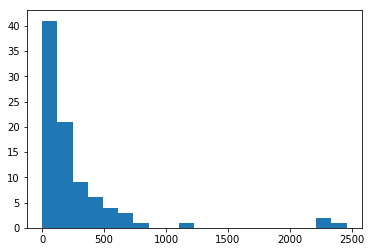

In [7]:
plt.hist(discs_ords['quant_all_discs'], bins=20)

(array([34., 20., 11.,  7., 10.,  0.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([  11. ,  135.5,  260. ,  384.5,  509. ,  633.5,  758. ,  882.5,
        1007. , 1131.5, 1256. , 1380.5, 1505. , 1629.5, 1754. , 1878.5,
        2003. , 2127.5, 2252. , 2376.5, 2501. ]),
 <a list of 20 Patch objects>)

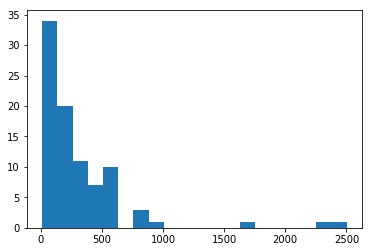

In [8]:
plt.hist(discs_ords['quant_no_disc'], bins=20)

In [ ]:
#Again, the two distributions look very close, both with greatest density around the lower values
#At this point I can predict that there won't be a significant difference between the two

In [ ]:
plt.hist(discs_ords['quant_no_disc'], normed=True, bins=20)

C:\Users\Stee\Anaconda3good\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


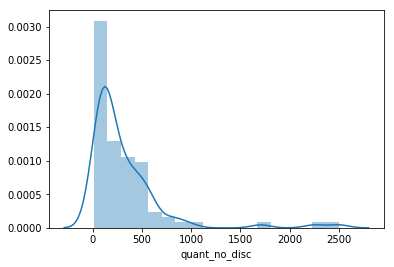

In [9]:
#Show the distribution with a pdf to check for normality
sns.distplot(discs_ords['quant_no_disc'])

In [32]:
print("The population distribution has only", discs_ords.shape[0], "values.")

The population distribution has only 89 values.


In [ ]:
#OFFICE HOURS QUESTION: Is it acceptable to make a sampling distribution 
#out of this? CHECKPOINT FOR JEFF

In [102]:
#Get the data to look more "normal" by 
#turning it into sample distributions
#"Control" is the no-discount group
#"Treatment" is the discount group
control1 = np.array(sampling_dist(np.array(discs_ords['quant_no_disc']), 100))
treatment1 = np.array(sampling_dist(np.array(discs_ords['quant_all_discs']), 100))

In [103]:
#Check for similarity between sampling distribution means
#and population means
control1.mean(), discs_ords['quant_no_disc'].mean()

(320.30266666666665, 321.3370786516854)

In [104]:
treatment1.mean(), discs_ords['quant_all_discs'].mean()

(255.23933333333335, 255.25842696629215)

In [ ]:
#Both are pretty close

In [34]:
diff = control1.mean() - treatment1.mean()
diff

64.24199999999996

C:\Users\Stee\Anaconda3good\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


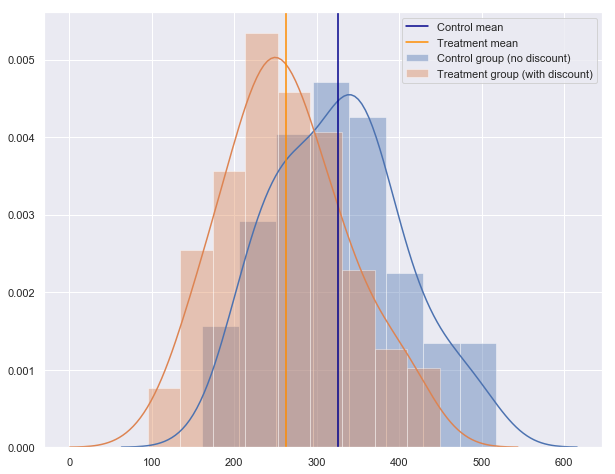

In [90]:
#Compare both sampling distributions with hist and kde
sns.set(color_codes = True)
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(control1, label = "Control group (no discount)")
sns.distplot(treatment1, label = "Treatment group (with discount)")
plt.axvline(control1.mean(), color = 'darkblue', label = 'Control mean')
plt.axvline(treatment1.mean(), color = 'darkorange', label = 'Treatment mean')
plt.legend()
plt.show()

In [28]:
#This plot shows that the mean for the control group is higher.
#The question is, where on the distribution for the control group
#would the value for the mean of the treament group fall? If it is
#outside the critical region in the tails, then it will not be statistically
#significantly different.

In [108]:
control1.mean(), treatment1.mean()

(320.30266666666665, 255.23933333333335)

In [92]:
control1.std(), treatment1.std()

(78.659613988939, 74.82993678706107)

In [55]:
#Calculate a two-sample t statistic
#First get variance of both samples
var = ((control1.std()**2) + (treatment1.std()**2)) / (len(control1) + len(treatment1) - 2)
var

59.5295672345679

In [59]:
control1.std()**2

6187.334872888888

In [62]:
treatment1.std()**2

5599.519439555556

In [78]:
control1_var = sum([(i - np.mean(control1))**2 for i in control1])
control1_var

618733.4872888888

In [79]:
treatment1_var = sum([(i - np.mean(treatment1))**2 for i in treatment1])
treatment1_var

559951.9439555553

In [67]:
#FROM THE LAB ON TWO SAMPLE T TESTS
#def variance(sample):
#    sample_mean = np.mean(sample)
#    return sum([(i - sample_mean)**2 for i in sample])
#def sample_variance(sample1, sample2):
#    n_1, n_2 = len(sample1), len(sample2)
#    var_1, var_2 = variance(sample1), variance(sample2)
#    return (var_1 + var_2)/((n_1 + n_2)-2)

In [80]:
vari = (control1_var + treatment1_var) / (len(control1) + len(treatment1) -2)
vari

5952.9567234567885

In [81]:
#Build numerator for t statistic
numer = np.mean(treatment1) - np.mean(control1)
#Build denominator for t statistic
denom = np.sqrt(vari * ((1/len(treatment1)) + (1/len(control1))))
t = numer / denom
t

-5.887591810766747

In [109]:
test_stat, p_value = stats.ttest_ind(treatment1, control1)
test_stat, p_value

(-5.508644149453619, 1.1153214293532252e-07)

In [111]:
#Another way to find the t value
t_alt = stats.t.ppf(q = 0.975, df = (len(control1) + len(treatment1) -2))
t_alt

1.9720174778338955

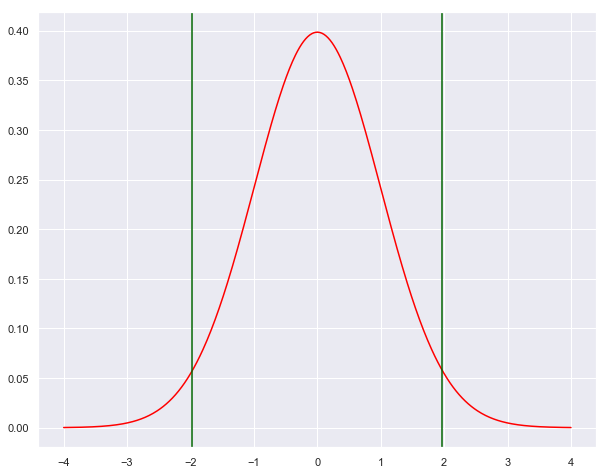

In [106]:
#Draw a t distribution
#A set of points for x
xs = np.linspace(-4, 4, 500)
#A probability density function for the t-dist
ys = stats.t.pdf(xs, (len(control1) + len(treatment1) - 2), 0, 1)

#Draw a figure
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
#t dist in red
ax.plot(xs, ys, color = 'red')
#critical region
ax.axvline(t_alt, color = 'darkgreen')
#other critical region
ax.axvline(-t_alt, color = 'darkgreen')
plt.show()

In [85]:
stats.t.sf(abs(t), len(control1) + len(treatment1) - 1) * 2

1.64338928498428e-08

(-5.508644149453619, 1.1153214293532252e-07)

-5.887591810766746

In [ ]:
####EDA
#Look at how many customers each company has
df = pd.read_sql_query("""SELECT Customer.Id, Customer.CompanyName
                            FROM Customer
                            ORDER BY Customer.CompanyName
                        """, engine)

In [ ]:
#Every company has only one customer. Orders can therefore be counted by customer or by company.
sum(df['CompanyName'].value_counts() > 1)

In [ ]:
# JUST AN EXAMPLE from the labs
#"""SELECT o.ID, c.CompanyName, Count(*) num_orders 
#    FROM [Order] o
#    INNER JOIN Customer c on o.CustomerID = c.ID 
#    GROUP BY c.CompanyName 
#    ORDER BY num_orders DESC"""

#df = pd.read_sql_query("""SELECT o.ID, c.CompanyName, Count(*) num_orders FROM [Order] \
#o INNER JOIN Customer c on o.CustomerID = c.ID GROUP BY c.CompanyName ORDER BY num_orders DESC""", engine)
#df.head()

In [ ]:
#######################################
#AUTOMAPPER BITS
#Instantiate metadata to reflect the engine
#metadata = MetaData()
#metadata.reflect(engine)

In [ ]:
#Create mappings to treat the database elements as OOP objects
Base = automap_base(metadata=metadata)
Base.prepare()

In [ ]:
#['Category', 'Customer', 'CustomerCustomerDemo', 'CustomerDemographic', 
#'Employee', 'EmployeeTerritory', 'Order', 'OrderDetail', 'Product', 'Region', 'Shipper', 'Supplier', 'Territory']

In [ ]:
#Create an object for each table
Category = Base.classes.Category
Customer = Base.classes.Customer
CustomerCustomerDemo = Base.classes.CustomerCustomerDemo
CustomerDemographic = Base.classes.CustomerDemographic
Employee = Base.classes.Employee
EmployeeTerritory = Base.classes.EmployeeTerritory
Order = Base.classes.Order
OrderDetail = Base.classes.OrderDetail
Product = Base.classes.Product
Region = Base.classes.Region
Shipper = Base.classes.Shipper
Supplier = Base.classes.Supplier
Territory = Base.classes.Territory

In [ ]:
categories = session.query(Category).all()

for cat in categories:
    print(cat.CategoryName, cat.Description)

In [ ]:
for instance in session.query(Category):
    print(instance.Description)

In [ ]:
countries = []
for instance in session.query(Customer):
    countries.append(instance.Country)

In [ ]:
countries_df = pd.DataFrame(countries)
countries_df[0].value_counts()

In [ ]:
regions = []
for instance in session.query(Customer):
    regions.append(instance.Region)

regions_df = pd.DataFrame(regions)
regions_df[0].value_counts()

In [ ]:
names = []
for instance in session.query(Customer):
    names.append(instance.ContactName)
    
names_df = pd.DataFrame(names)
names_df[0].value_counts()

In [ ]:
len(set(names))

In [ ]:
session.query(Customer).column_descriptions

In [ ]:
result = session.execute('''SELECT *
                            FROM Customer
                        ;''')

In [ ]:
customer_df = pd.DataFrame(result.fetchall())

In [ ]:
customer_df.shape

## Hypothesis 1
Do discounts have a statistically significant effect on the number of products customers order? If so, at what level(s) of discount?

product (quantity) ordered by customers, no discount

product (quantity) order by customers, wiht discount

H0: Discount does not have an effect on the number of products ordered by a customer. Control = Treatment

H1: Discount has an effect on the number of products ordered by a customer. Control < or > Treament